# R209 et ChatGPT


"Un prof en manque d’inspiration cherche à utiliser les progrès de l’intelligence
artificielle pour écrire un examen à sa place."


Voici une le notebook de ses échanges avec l’IA ChatGPT.


-----

l'IA affirme :

_cette suite converge vers $0$, le point fixe de $f$_.

In [14]:
def f(x):
    return 1 - abs(x)


def recurring_sequence(initial_value, iterations):
    sequence = [initial_value]
    
    for i in range(iterations):
        next_value = f(sequence[-1])
        sequence.append(next_value)
        
    return sequence

# Example usage
initial_value = 0.9
iterations = 10
sequence = recurring_sequence(initial_value, iterations)

# Print the sequence
for i,value in enumerate(sequence):
    print(f"Iteration {i}: {value}")

Iteration 0: 0.9
Iteration 1: 0.09999999999999998
Iteration 2: 0.9
Iteration 3: 0.09999999999999998
Iteration 4: 0.9
Iteration 5: 0.09999999999999998
Iteration 6: 0.9
Iteration 7: 0.09999999999999998
Iteration 8: 0.9
Iteration 9: 0.09999999999999998
Iteration 10: 0.9


### Analyse

Si on essaie la solution proposée par chatGPT on doute rapidement.

La suite ne converge visiblement pas vers $0$ et semble osciller entre $0.9$ et $0.1$, les valeurs paires de la suites semblant toutes valoir $0.9$ tandis que les impaires semblent constantes à $0.09999999999999998$ (sûrement $0.1$ mais avec un problème lié à la représentation machine des nombres réels).


Essayons de comprendre le comportement complet de la suite.

#### Tracé de la fonction et de la suite



In [15]:
#import divers, ne pas prendre en compte
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#magic
import warnings
warnings.filterwarnings('ignore')

In [16]:
def subdivision(a, b, n):
    d = (b - a) / n
    return [a + k * d for k in range(n + 1)]

In [17]:
def escalier(f, a, b, c, d, x0, n):
    xs = subdivision(a, b, 200)
    ys = [f(x) for x in xs]
    pad = 0.
    plt.axis([a - pad, b + pad, c - pad, d + pad])
    plt.plot(xs, ys, 'b')
    plt.plot(xs, xs, 'k')
    x = x0
    coul = 'r'
    plt.plot([x0, x0], [0, f(x0)], coul)
    for k in range(n):
        plt.plot([x, f(x)], [f(x), f(x)], coul)
        plt.plot([f(x), f(x)], [f(x), f(f(x))], coul)
        x = f(x)
    plt.grid()
    plt.show()

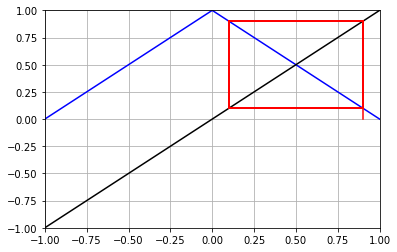

In [18]:
escalier(f, -1, 1, -1, 1, .9, 15)

On remarque que la fonction $f$ (en bleu) semble croissante jusqu'a $0$ puis décroissante.

D'autre part, la courbe bleue ne coupe pas la courbe noire en $0$, donc $0$ n'est pas un point fixe de $f$. On le vérifie numériquement 

In [19]:
print("f(0) =",f(0))

f(0) = 1


Donc $0$ n'est pas un point fixe de $f$, il est donc _impossible_ que la suite $(u_n)$ converge vers $0$.

L'affirmation de l'IA est donc erronnée.


_remarque : ces observations suffisaient pour obtenir la note maximale à l'exercice du CT_ 

#### Comportement réél

on remarque que pour les nombre rééls positif, $1-|x| = 1-x$.

De plus l'intervalle $[0,1]$ est stable par $f$, donc $(u_n) \in [0,1]$ est bornée (pour $u_0=0.9$)


Le comportement oscillant incite à étudier le les suites des termes pairs et impairs. Posons :

$p_n = u_{2n}$ et $i_n = u_{2n+1}$.
Donc 
\begin{align*}
p_{n+1} é&= u_{2(n+1)}\\
&= u_{2n+2}\\
&= f(u_{2n + 1})\\
&= f(f(u_{2n}))\\
&= f(f(p_n))
\end{align*}


Posons $g = f \circ f$ (ie $g(x) = f(f(x))$
On a alors

$\begin{cases}
p_0 &= 0.9\\
p_{n+1} &= g(p_n)
\end{cases}$

et de manière similaire


$\begin{cases}
i_0 &= u_1 = 0.1\\
i_{n+1} &= g(i_n)
\end{cases}$

-----

**étude de $g$**

\begin{align*}
g(x) &= f(f(x)) \\
&= f(1-|x|) \\
\text{comme $x \in [0,1]$}\\
&= f(1-x)\\
&= 1-|1-x|\\
\text{ comme $1-x \in [0,1]$}\\
&= 1-(1-x)\\
&=x
\end{align*}


Donc $g(x) = x$

Ainsi 

$\begin{cases}
p_0 &= 0.9\\
p_{n+1} &= p_n
\end{cases}$
est la suite constante égale à $0.9$

tandis que la suite

$\begin{cases}
i_0 &= u_1 = 0.1\\
i_{n+1} &= i_n
\end{cases}$

est la suite constante égale à $0.1$


### Conclusion

Le chatbot d'OpenAI fournit une réponse détaillée et convaincante à la question, pourtant complexe et assez spécifique, posée.

Le code proposé est fonctionnel, et les explications données sont pertinentes.

Le chatbot renvoie effectivement une suite définie par récurrence, et "explique" bien le fonctionnement théorique d'une telle suite.

Cependant l'affirmation principale "la suite converge vers $0$" est erronnée, et cela de manière grossière. Un test rapide permet de se convaincre que la suite des termes pairs est constante tout comme celle des termes impairs.


Cela est confirmé par une étude théorique relativement simple est classique.

